<a href="https://colab.research.google.com/github/Rogerio-mack/IA/blob/main/Keras_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Keras TensorFlow

Pontos importantes aqui:

* Transformações dos dados: hot encode e normalização
* GPU 
* Como configurar as camadas da rede deep learning
* Principais parâmetros da rede e do aprendizado
* Evolução do Treinamento
* Conjuntos de Treinamento, Teste e Validação
* Predição: hot encode^-1
* Busca por melhores modelos 

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [135]:
from tensorflow import keras
from tensorflow.keras import layers
from keras import Sequential, layers
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report  

In [136]:
print("TF Version: ", tf.__version__)
print("GPU available: ", tf.config.list_physical_devices('GPU')) # havendo disponibilidade o modelo executa empregando GPU

TF Version:  2.9.2
GPU available:  []


In [137]:
#@markdown `plot_loss_acc(history,more_title='')`
def plot_loss_acc(history,more_title=''):
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc

# Dados

In [138]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Variáveis Preditoras e Objetivo

## Hot Encode da variável Objetivo

Esta transformação é necessária na maior parte dos frameworks de Deep Learning.

In [139]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(df[['species']])
transformed = hot_encode.transform(df[['species']]).toarray()
# print(transformed)

transformed_df = pd.DataFrame(transformed, columns=hot_encode.get_feature_names_out())
display(transformed_df.head())

df = pd.concat([df, transformed_df],axis=1) 
df.head()

,species_setosa,species_versicolor,species_virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,setosa,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,setosa,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,setosa,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,setosa,1.0,0.0,0.0


In [140]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_setosa', 'species_versicolor', 'species_virginica'],
      dtype='object')

In [141]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['species_setosa', 'species_versicolor', 'species_virginica']]

# Normalização

Uma boa prática ao lidar com modelos neurais.

In [142]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)



## Separando os dados de Treinamento e Teste

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)


In [144]:
X_train.shape

(105, 4)

In [145]:
input_dim = X_train.shape[1] # nr de features

In [146]:
y_train.shape

(105, 3)

In [147]:
output_dim = y_train.shape[1] # nr de classes

# Configuração e Treinamento da Rede Deep Learning



In [148]:
# Net config 
model = Sequential([layers.Dense(X_train.shape[1], activation='tanh', input_shape=[X_train.shape[1],])]) 

model.add(layers.Dense(8, activation='tanh'))
model.add(layers.Dense(8, activation='tanh'))

model.add(layers.Dense(y_train.shape[1], activation='tanh'))

# Train config
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)


Epoch 1/100
3/3 [==============================] - 1s 117ms/step - loss: 5.2560 - accuracy: 0.1310 - val_loss: 7.2719 - val_accuracy: 0.1429
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 5.2221 - accuracy: 0.1310 - val_loss: 7.2634 - val_accuracy: 0.1429
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 5.1858 - accuracy: 0.1310 - val_loss: 7.2802 - val_accuracy: 0.1429
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 5.1554 - accuracy: 0.1310 - val_loss: 7.8061 - val_accuracy: 0.1429
Epoch 5/100
3/3 [==============================] - 0s 16ms/step - loss: 5.3157 - accuracy: 0.1310 - val_loss: 7.7719 - val_accuracy: 0.1429
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 5.4811 - accuracy: 0.1310 - val_loss: 7.7450 - val_accuracy: 0.1429
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 5.4509 - accuracy: 0.1310 - val_loss: 8.4887 - val_accuracy: 0.1429
Epoch 8/100
3/3 [==

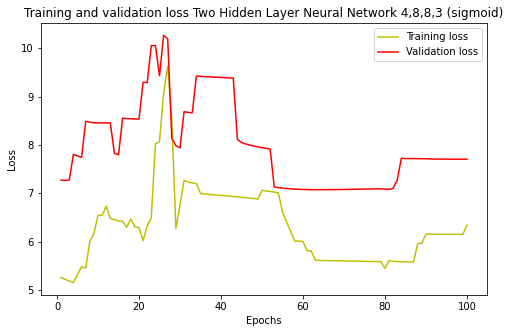

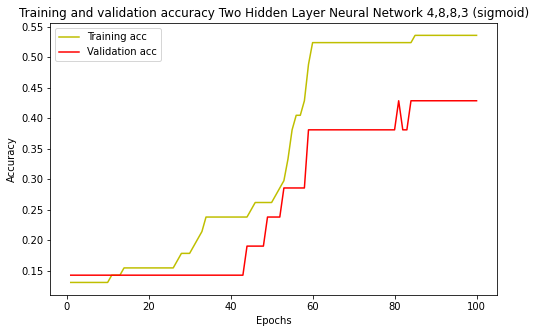

Two Hidden Layer Neural Network 4,8,8,3 (sigmoid)Accuracy Train: 53.57 %, Accuracy Test: 42.86 %


In [149]:
loss, val_loss, acc, val_acc = plot_loss_acc(history,'Two Hidden Layer Neural Network 4,8,8,3 (sigmoid)')


# Predição 

Vamos fazer a inversa do Hot Encode, para isso podemos empregar a função  `np.argmax()`.

In [150]:
# Predict
y_pred = np.argmax(model.predict(X_test), axis=-1)
    
print(confusion_matrix(np.argmax(y_test.to_numpy(), axis=-1),y_pred))
print(classification_report(np.argmax(y_test.to_numpy(), axis=-1),y_pred))

2/2 [==============================] - 0s 6ms/step
[[15  0  0]
 [ 3 10  2]
 [ 1 14  0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       0.42      0.67      0.51        15
           2       0.00      0.00      0.00        15

    accuracy                           0.56        45
   macro avg       0.40      0.56      0.47        45
weighted avg       0.40      0.56      0.47        45



In [151]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.447238445281982
Test accuracy: 0.5555555820465088


# Explore melhores resultados

* Experimente empregar o parâmetro `batch_size`
* Experimente as funções de ativação `relu` (hidden) e `softmax` (output) 
* Experimente diferentes números de camadas e elementos por camada

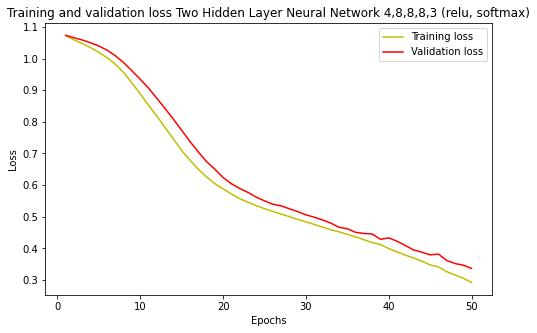

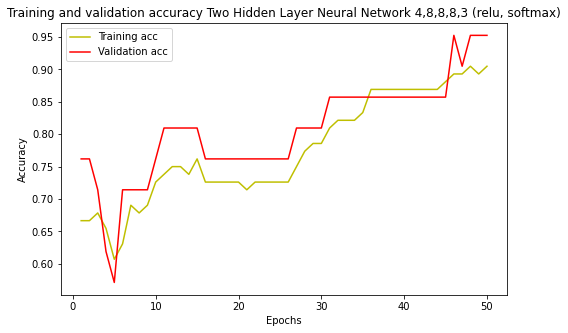

Two Hidden Layer Neural Network 4,8,8,8,3 (relu, softmax)Accuracy Train: 90.48 %, Accuracy Test: 95.24 %
2/2 [==============================] - 0s 5ms/step

Test loss: 0.3280520737171173

Test accuracy: 0.8888888955116272
[[15  0  0]
 [ 0 11  4]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.92      0.73      0.81        15
           2       0.78      0.93      0.85        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [152]:
# Net config 
model = Sequential([layers.Dense(X_train.shape[1], activation='relu', input_shape=[X_train.shape[1],])]) 

model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(8, activation='relu'))

model.add(layers.Dense(y_train.shape[1], activation='softmax'))

# Train config
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=8, verbose=0)

loss, val_loss, acc, val_acc = plot_loss_acc(history,'Two Hidden Layer Neural Network 4,8,8,8,3 (relu, softmax)')

# Predict
y_pred = np.argmax(model.predict(X_test), axis=-1)

score = model.evaluate(X_test, y_test, verbose=0)
print('\nTest loss:', score[0])
print('\nTest accuracy:', score[1])

print(confusion_matrix(np.argmax(y_test.to_numpy(), axis=-1),y_pred))
print(classification_report(np.argmax(y_test.to_numpy(), axis=-1),y_pred))

